# Homework 1 Assignment: Coding Portion

In [1]:
# Import all necessary libraries for the assignment.

import keras as keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Problem 4: Write a Python function that simulates a single neuron. The neuron takes two inputs, applies a weight to each,
# adds a bias, and applies a ReLU activation function. Use the following parameters: x_1 = .5, x_2 = .3, w_1 = .2, w_2 = .8,
# b = -.1

# Initialize parameters for neural network.

input_vals = [.5, .3]
weight_vals = [.2, .8]
bias_val = -.1

def single_neuron(inputs, weights, bias):
    weighted_output = np.dot(inputs, weights) + bias
    activated_output = np.maximum(0, weighted_output)
    return activated_output

print(single_neuron(input_vals, weight_vals, bias_val))

# Round the output value to 4 decimal places.

0.23999999999999996


In [5]:
# Problem 5: Write a Python function that implements forward propagation for a simple 2 layer
# neural network (input, hidden layer, output layers) with ReLU activation in the hidden layer
# and sigmoid activation in the output layer. Use the below parameters.


# Initialize parameters for neural network.

nn_input = [.7, .5]
hidden_weights = [[.3, .5], [.7, -.1]]
hidden_bias = [.2, -.4]
output_weights = [.6, -.2]
output_bias = .1

def feedforward_NN(inputs, weights1, bias1, weights2, bias2):
    hidden_output = np.dot(inputs, weights1) + bias1
    relu_activation = np.maximum(0, hidden_output)
    hidden_input = np.dot(relu_activation, weights2) + bias2
    final_output = 1./(1 + np.exp(-hidden_input))
    return final_output

print(feedforward_NN(nn_input, hidden_weights, hidden_bias, output_weights, output_bias))


0.6355265132643103


In [2]:
# Problem 6: Extend the previous problem to include backpropagation. Given a true label y = 1,
# update the weights and biases using gradient descent with a learning rate of 0.01.

# Defining ReLU activation function.
def relu(x):
    return np.maximum(0, x)

# Define the derivative of ReLU for backpropagation.
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Define Sigmoid activation function.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of Sigmoid for backpropagation.
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define the forward propagation function.
def forward_propagation(inputs, weights_1, biases_1, weights_2, biases_2):
    # Hidden layer: inputs -> weighted sum -> ReLU activation.
    z1 = np.dot(np.array(weights_1).T, inputs) + biases_1
    hidden_layer_output = relu(z1)
    
    # Output layer: hidden layer -> weighted sum -> Sigmoid activation.
    z2 = np.dot(np.array(weights_2).T, hidden_layer_output,) + biases_2
    output_layer_output = sigmoid(z2)
    
    return z1, hidden_layer_output, z2, output_layer_output

# Backpropagation function to display updated weights and biases.
def backpropagation_display(inputs, z1, hidden_layer_output, z2, output, weights_1, biases_1, weights_2, biases_2, y, learning_rate):
    # Use Binary Cross Entropy Loss Function.
    d_loss_output = - (y/output - (1-y)/(1-output))  # Derivative of loss with respect to output.
    
    # Output layer gradients.
    d_z2 = d_loss_output * sigmoid_derivative(z2)  # Derivative of loss with respect to z2
    d_weights_2 = np.dot(d_z2, hidden_layer_output.T)  # Derivative of loss with respect to weights_2
    d_biases_2 = d_z2  # Derivative of loss with respect to biases_2.
    
    # Backpropagating to hidden layer.
    d_hidden_output = np.dot(weights_2, d_z2) * relu_derivative(z1)  # Derivative of loss with respect to hidden layer output
    d_weights_1 = np.dot(d_hidden_output.reshape(-1, 1), np.array(inputs).reshape(1, -1))  # Derivative of loss with respect to weights_1
    d_biases_1 = d_hidden_output  # Derivative of loss with respect to biases_1
    
    # Update weights and biases using gradient descent
    weights_1 -= learning_rate * d_weights_1
    biases_1 -= learning_rate * d_biases_1
    weights_2 -= learning_rate * d_weights_2
    biases_2 -= learning_rate * d_biases_2
    
    print("Updated weights and biases:")
    print("Weights 1 (Hidden Layer):")
    print(weights_1)
    print("Biases 1 (Hidden Layer):")
    print(biases_1)
    print("Weights 2 (Output Layer):")
    print(weights_2)
    print("Biases 2 (Output Layer):")
    print(biases_2)
    
    return weights_1, biases_1, weights_2, biases_2

# Initialize inputs, weights, and biases
inputs = [0.7, 0.5]
weights_1 = [[0.3, 0.5], [0.7, -0.1]]
biases_1 = [0.2, -0.4]
weights_2 = [0.6, -0.2]
biases_2 = 0.1

# Initialize the True label.
y = 1

# Initialize the Learning rate.
learning_rate = 0.01

# Perform forward propagation.
z1, hidden_layer_output, z2, output = forward_propagation(inputs, weights_1, biases_1, weights_2, biases_2)

# Print the output
# print(f"The output of the network before backpropagation: {output:.4f}")

# Perform backpropagation and display updated weights and biases.
weights_1, biases_1, weights_2, biases_2 = backpropagation_display(
    inputs, z1, hidden_layer_output, z2, output, weights_1, biases_1, weights_2, biases_2, y, learning_rate
)

# Perform forward propagation again to see the new output after weight updates.
_, _, _, new_output = forward_propagation(inputs, weights_1, biases_1, weights_2, biases_2)

# Print the updated output.
print(f"The output of the network after backpropagation: {new_output:.4f}")



Updated weights and biases:
Weights 1 (Hidden Layer):
[[ 0.30153079  0.50109342]
 [ 0.7        -0.1       ]]
Biases 1 (Hidden Layer):
[ 0.20218684 -0.4       ]
Weights 2 (Output Layer):
[ 0.60277 -0.2    ]
Biases 2 (Output Layer):
0.1036447348673569
The output of the network after backpropagation: 0.6373


In [13]:
# Problem 7: Build a simple feedforward neural network using Keras. The network should:
# -Have 2 hidden layers with 64 neurons each.
# -Use ReLU as the activation function for the hidden layers.
# -Use the sigmoid activation function for the output layer.
# -Compile the model with binary cross-entropy loss and the Adam optimizer.

keras_feed_forward = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

keras_feed_forward.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Problem 8: Train the neural network from Problem 7 using the Iris datset. Preprocess the data by converting the target
# labels to binary (1 for class setosa, 0 for the other classes). Use 20% of the data for validation and train the model
# for 50 epochs.

# Load the Iris dataset and preprocess data by setting target labels to binary {0,1}.
iris_data = load_iris()
iris_data.data.shape
print(iris_data.target_names)
print(iris_data.feature_names)
print(iris_data.target)

iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df['binary_target'] = iris_df['target'].apply(lambda x: 1 if x == 0 else 0)

iris_df.head()

# Create design matrix and target and standardize the design matrix.

y_resp = iris_df.drop(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target'], axis=1)
X_mat = iris_df.drop(['target', 'binary_target'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_mat)

#Split the Iris data into training and validation sets.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resp, test_size=.20, shuffle=True, random_state=42)
sample_size_iris, dimensions_iris = X_train.shape

# Train the neural network model constructed in Problem 7 to the updated Iris dataset for 50 epochs.

keras_feed_forward_iris = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(dimensions_iris,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

keras_feed_forward_iris.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

run_iris_nn = keras_feed_forward_iris.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)
print("Train score:", keras_feed_forward_iris.evaluate(X_train, y_train))
print("Test score:", keras_feed_forward_iris.evaluate(X_test, y_test))


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.0819 - loss: 0.7812 - val_accuracy: 0.4000 - val_loss: 0.7025
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4785 - loss: 0.6909 - val_accuracy: 0.8667 - val_loss: 0.6168
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9510 - loss: 0.6013 - val_accuracy: 1.0000 - val_loss: 0.5398
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9967 - loss: 0.5308 - val_accuracy: 1.0000 - val_loss: 0.4724
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss:

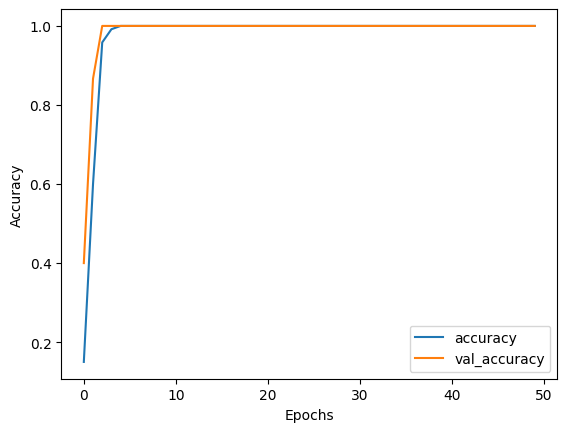

In [11]:
# Problem 9: Evaluate the model's performance on the validation data using accuracy and plot the training and validation
# loss over the epochs.

# Plotting the accuracies

plt.plot(run_iris_nn.history['accuracy'], label='accuracy')
plt.plot(run_iris_nn.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

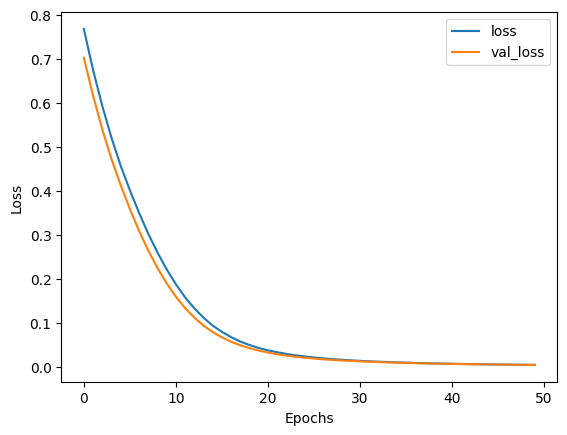

In [12]:
# Plotting the losses

plt.plot(run_iris_nn.history['loss'], label='loss')
plt.plot(run_iris_nn.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()